Imported all necessary packages
Seperated training and test data
Training Samples: 266709
Testing Samples: 66678


C:\Users\gajer\AppData\Local\Temp\ipykernel_26680\2072034070.py:45: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_train_classes = pd.value_counts(train_df['Class'])


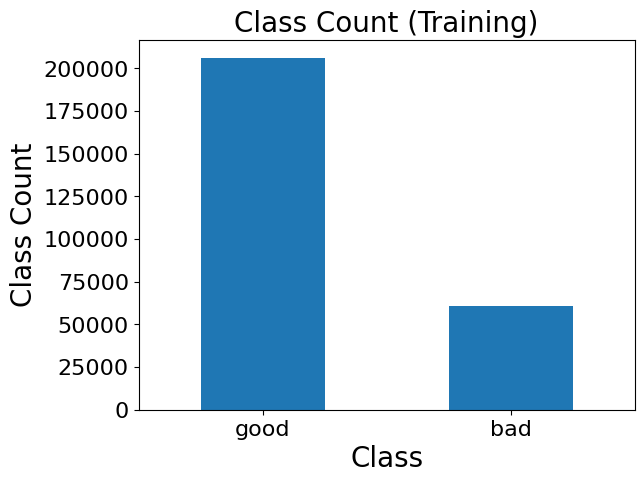

C:\Users\gajer\AppData\Local\Temp\ipykernel_26680\2072034070.py:54: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_test_classes = pd.value_counts(test_df['Class'])


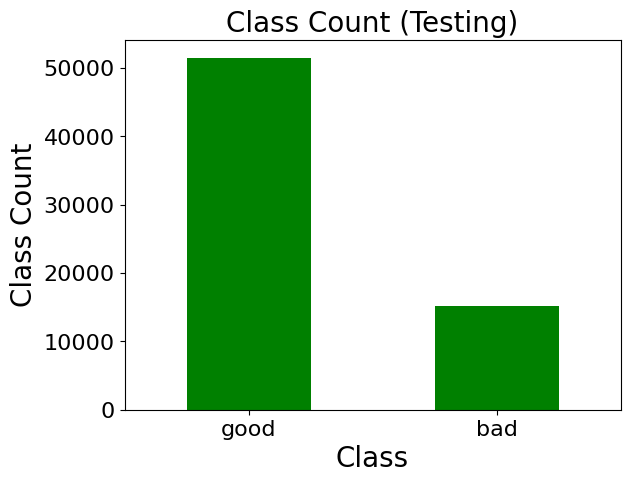

Done tokenizer
Full URL: aquatixbottle.com/vkZuz9
Tokenized URL: ['aquatixbottle.com', 'vkZuz9', 'aquatixbottle']
Training Count Vectorizer


c:\Users\gajer\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training TF-IDF Vectorizer
Vectorizing Completed
Test Count Vectorizer
Test TFIDF Vectorizer
Vectorizing Completed
Report Generator
multinomial naive bayes

### Model Built ###

              precision    recall  f1-score   support

         bad       0.99      0.86      0.92     15149
        good       0.96      1.00      0.98     51529

    accuracy                           0.97     66678
   macro avg       0.97      0.93      0.95     66678
weighted avg       0.97      0.97      0.97     66678



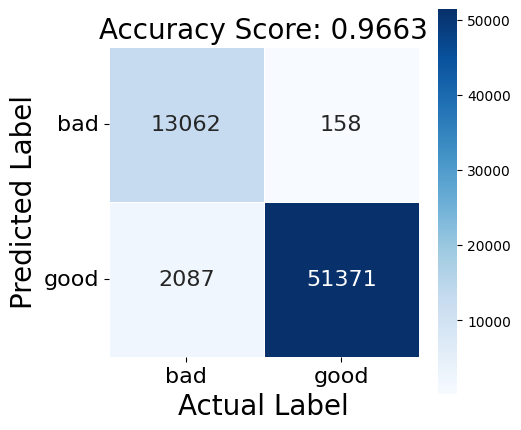

logistic regression

### Model Built ###

              precision    recall  f1-score   support

         bad       0.95      0.84      0.89     15149
        good       0.96      0.99      0.97     51529

    accuracy                           0.95     66678
   macro avg       0.95      0.92      0.93     66678
weighted avg       0.95      0.95      0.95     66678



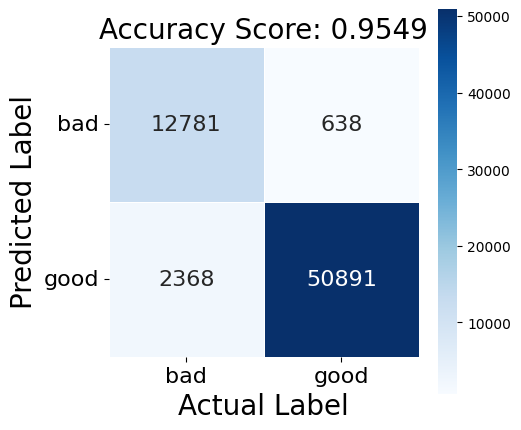

random forest

### Model Built ###

              precision    recall  f1-score   support

         bad       0.95      0.86      0.90     15149
        good       0.96      0.99      0.97     51529

    accuracy                           0.96     66678
   macro avg       0.95      0.92      0.94     66678
weighted avg       0.96      0.96      0.96     66678



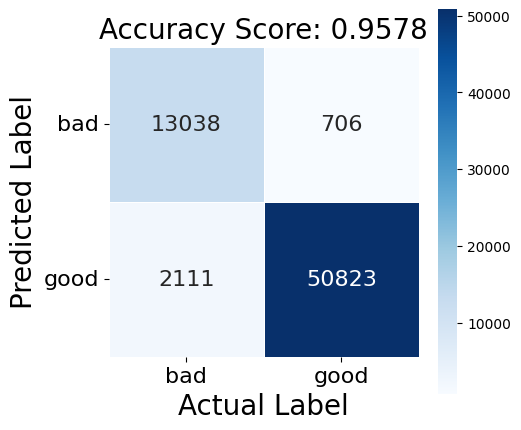

Desion tree

### Model Built ###

              precision    recall  f1-score   support

         bad       0.81      0.85      0.83     15149
        good       0.95      0.94      0.95     51529

    accuracy                           0.92     66678
   macro avg       0.88      0.89      0.89     66678
weighted avg       0.92      0.92      0.92     66678



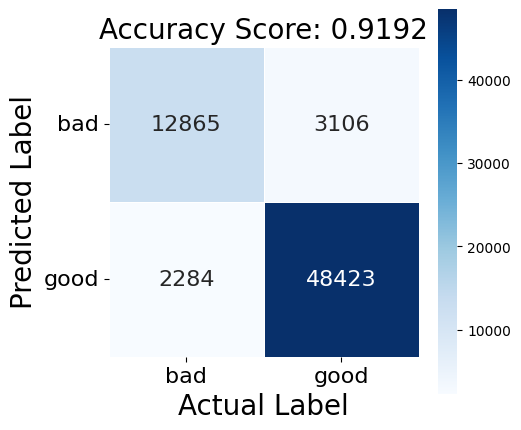

In [1]:
import pandas as pd

url_df = pd.read_csv('Malicious URLs.csv')
url_df.tail(50)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re

%matplotlib inline

# Import Scikit-learn helper functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Import Scikit-learn models
#scikit-learn is a free software machine learning library for the Python programming language
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Import Scikit-learn metric functions
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
print("Imported all necessary packages")

# Seperate the Training and Test data

test_percentage = .2
train_df, test_df = train_test_split(url_df, test_size=test_percentage, random_state=42)

labels = train_df['Class']
test_labels = test_df['Class']

print("Seperated training and test data")

# Display each class
print("Training Samples:", len(train_df))
print("Testing Samples:", len(test_df))

# Graph counts of each class, for both training and testing
count_train_classes = pd.value_counts(train_df['Class'])
count_train_classes.plot(kind='bar', fontsize=16)
plt.title("Class Count (Training)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

count_test_classes = pd.value_counts(test_df['Class'])
count_test_classes.plot(kind='bar', fontsize=16, colormap='ocean')
plt.title("Class Count (Testing)", fontsize=20)
plt.xticks(rotation='horizontal')
plt.xlabel("Class", fontsize=20)
plt.ylabel("Class Count", fontsize=20)

plt.show()

# Tokenize the URL
#   The purpose of a tokenizer is to separate the features from the raw data
def tokenizer(url):
  """Separates feature words from the raw data
  Keyword arguments:
    url ---- The full URL

  :Returns -- The tokenized words; returned as a list
  """
  # Split by slash (/) and dash (-)
  tokens = re.split('[/-]', url)

  for i in tokens:
    # Include the splits extensions and subdomains
    if i.find(".") >= 0:
      dot_split = i.split('.')

      # Remove .com and www. since they're too common
      if "com" in dot_split:
        dot_split.remove("com")
      if "www" in dot_split:
        dot_split.remove("www")

      tokens += dot_split

  return tokens

print("Done tokenizer")

# Sample example of tokenizer

print("Full URL:", url_df['URLs'][5])

# Tokenize test URL
tokenized_url = tokenizer(url_df['URLs'][5])
print("Tokenized URL:", tokenized_url)


# Vectorizer the training inputs
#   There are two types of vectors:
#     1. Count vectorizer
#     2. Term Frequency-Inverse Document Frequency (TF-IDF)
#     TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus).
#     It considers both the term frequency (how often a word appears in a document) and the inverse document frequency (how unique or rare a word is across the entire corpus).
print("Training Count Vectorizer")
cVec = CountVectorizer(tokenizer=tokenizer)
count_X = cVec.fit_transform(train_df['URLs'])

print("Training TF-IDF Vectorizer")
tVec = TfidfVectorizer(tokenizer=tokenizer)
tfidf_X = tVec.fit_transform(train_df['URLs'])

print("Vectorizing Completed")


# Vectorize the testing inputs

print("Test Count Vectorizer")
test_count_X = cVec.transform(test_df['URLs'])#   Use 'transform' instead of 'fit_transform' since we had already trained our vectorizers

print("Test TFIDF Vectorizer")
test_tfidf_X = tVec.transform(test_df['URLs'])


print("Vectorizing Completed")


# Define report generator

def generate_report(cmatrix, score, creport):
  """Generates and displays graphical reports
  Keyword arguments:
    cmatrix - Confusion matrix generated by the model
    score --- Score generated by the model
    creport - Classification Report generated by the model

  :Returns -- N/A
  """
  # Transform cmatrix because Sklearn has pred as columns and actual as rows.
  cmatrix = cmatrix.T

  # Generate confusion matrix heatmap
  plt.figure(figsize=(5,5))
  sns.heatmap(cmatrix,
              annot=True,
              fmt="d",
              linewidths=.5,
              square = True,
              cmap = 'Blues',
              annot_kws={"size": 16},
              xticklabels=['bad', 'good'],
              yticklabels=['bad', 'good'])

  plt.xticks(rotation='horizontal', fontsize=16)
  plt.yticks(rotation='horizontal', fontsize=16)
  plt.xlabel('Actual Label', size=20);
  plt.ylabel('Predicted Label', size=20);

  title = 'Accuracy Score: {0:.4f}'.format(score)
  plt.title(title, size = 20);

  # Display classification report and confusion matrix
  print(creport)
  plt.show()


print("Report Generator")


# Multinomial Naive Bayesian with TF-IDF
#TF-IDF is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus).
#It considers both the term frequency (how often a word appears in a document) and the inverse document frequency (how unique or rare a word is across the entire corpus).
#Multinomial Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem.
#It is well-suited for text classification tasks, especially when the input features are discrete (like word counts).
#Assumes that the features (word counts in this case) are conditionally independent, given the class label.
#The "Multinomial" part of the name comes from the assumption that the data follows a multinomial distribution.
print("multinomial naive bayes")
# Train the model
mnb_tfidf = MultinomialNB()
mnb_tfidf.fit(tfidf_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
score_mnb_tfidf = mnb_tfidf.score(test_tfidf_X, test_labels)
predictions_mnb_tfidf = mnb_tfidf.predict(test_tfidf_X)
cmatrix_mnb_tfidf = confusion_matrix(test_labels, predictions_mnb_tfidf)
creport_mnb_tfidf = classification_report(test_labels, predictions_mnb_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_mnb_tfidf, score_mnb_tfidf, creport_mnb_tfidf)

print("logistic regression")
# Train the model
lr_tfidf = LogisticRegression(random_state=42)
lr_tfidf.fit(tfidf_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
score_lr_tfidf = lr_tfidf.score(test_tfidf_X, test_labels)
predictions_lr_tfidf = lr_tfidf.predict(test_tfidf_X)
cmatrix_lr_tfidf = confusion_matrix(test_labels, predictions_lr_tfidf)
creport_lr_tfidf = classification_report(test_labels, predictions_lr_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_lr_tfidf, score_lr_tfidf, creport_lr_tfidf)


print("random forest")
# Train the model
rf_tfidf = RandomForestClassifier(random_state=42)
rf_tfidf.fit(tfidf_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
score_rf_tfidf = rf_tfidf.score(test_tfidf_X, test_labels)
predictions_rf_tfidf = rf_tfidf.predict(test_tfidf_X)
cmatrix_rf_tfidf = confusion_matrix(test_labels, predictions_rf_tfidf)
creport_rf_tfidf = classification_report(test_labels, predictions_rf_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_rf_tfidf, score_rf_tfidf, creport_rf_tfidf)

print("Desion tree")

# Train the model
dt_tfidf = DecisionTreeClassifier(random_state=42)
dt_tfidf.fit(tfidf_X, labels)

# Test the mode (score, predictions, confusion matrix, classification report)
score_dt_tfidf = dt_tfidf.score(test_tfidf_X, test_labels)
predictions_dt_tfidf = dt_tfidf.predict(test_tfidf_X)
cmatrix_dt_tfidf = confusion_matrix(test_labels, predictions_dt_tfidf)
creport_dt_tfidf = classification_report(test_labels, predictions_dt_tfidf)

print("\n### Model Built ###\n")
generate_report(cmatrix_dt_tfidf, score_dt_tfidf, creport_dt_tfidf)